# Hierarchical Clustering

Another way of looking at grouping of textual information is through Hierarchical clustering. As you know, we can have agglomerative or divisive algorithms and in this lab we will look at the Ward Clustering algorithm as an example of agglomerative clustering method.

We will use the same data from the previous lab.

In [42]:
import pandas as pd
import nltk
import re
import os
import codecs
from sklearn import feature_extraction
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [49]:
def remove_utf(text):
    return re.sub(r'[^\x00-\x7f]',r' ',text)

def remove_tinyURL(text):
    return re.sub(r'http\S+',r'',text)

path = "C:\\tmp\\Tweet-3000.txt"

max_tweets = 50
dataset = set()

file_input = open (path,"r")
lines = file_input.readlines()
for line in lines:
    dataset.add(remove_tinyURL(remove_utf(line.lower())))
    if (len(dataset)==max_tweets):
        break;
        
file_input.close()

print len(dataset)

50


In [50]:
def remove_punctuation(text):
    punctuations = ".,\"-\\/#!?$%\^&\*;:{}=\-_'~()"    
    filtered_text = [token for token in text if (not token in punctuations)]
    return filtered_text

def apply_stopwording(text, min_len):
    filtered_text = [token for token in text if (not token in stopwords.words('english') and len(token)>min_len)]
    return filtered_text

def apply_stemming(text):
    stemmer = nltk.PorterStemmer()
    normalized_text = [stemmer.stem(token) for token in text]
    return normalized_text

def apply_lemmatization(text):
    lemmatizer = nltk.WordNetLemmatizer()
    
    #normalized_text = [lemmatizer.lemmatize(token) for token in text]
    normalized_text = []
    
    for token in text:
        try:
            lemma = lemmatizer.lemmatize(token)
            normalized_text.append(lemma)
        except:
            print "Error: %s" % token
        
    return normalized_text

def remove_tweet_tags(text):
    text = re.sub('#(\w+)','',text)
    text = re.sub('@(\w+)','',text)
    return text
    

clean_tweets= []
tokenized_tweet = []
index = 1
for tweet in dataset:
    index+=1
    tokens = apply_stopwording(remove_punctuation(nltk.Text(nltk.word_tokenize(remove_tweet_tags(tweet)))), 3)
    clean_text = apply_stemming(tokens)
    clean_tweets.append(clean_text)
    tokenized_tweet.append(tokens)

In [109]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer



#terms=[str(set(token)) for token in clean_tweets]
terms = []
vocabulary = set()
for tweets in clean_tweets:
    text = ''
    for token in tweets:
        text+=token+' '
        check.add(token)
    terms.append(text)

#define vectorizer parameters ... We also pass the feature set (vocabulary)
tfidf_vectorizer = TfidfVectorizer(stop_words='english', use_idf=True, vocabulary=check)
tfidf_matrix = tfidf_vectorizer.fit_transform(terms)

print(tfidf_matrix.shape)
print len(check)

cosine_distance = 1 - cosine_similarity(tfidf_matrix)

(50, 204)
204


With this matrix of distances we will call the linkage function that generates a full hierarchical/agglomerative clustering of the elements.

This is a very flexible function with three parameters:

   <b>distance_matrix</b>: the matrix containing the distances of all pairs of elements.
   
   <b>method</b>: Linkage algorithm to use single, average, weighted, median, and ward (Ward Variance Minimization algorithm)
   
   <b>metric</b>: The distance metric to use sett https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.spatial.distance.pdist.html for more information.
   
The linkage will return the matrix Z containing the n-1 iterations used to merge the elements. Z[i] will contain information on which clusters were merged in the i-th iteration. Each element contains 4 elements: [index_1.  index_2.  distance.  #elemnents in the cluster]

In [110]:
from scipy.cluster.hierarchy import ward, dendrogram, linkage
import matplotlib.pyplot as plt
%matplotlib inline 

#Try with different methods
#linkage_matrix = linkage(cosine_distance,'single')
#linkage_matrix = linkage(cosine_distance,'average')
linkage_matrix = linkage(cosine_distance,'ward')

# We are using a for-loop else the indexes are displayed in decimal format
for i in range (0, 5):
    print linkage_matrix[i]

[ 43.          47.           0.65580921   2.        ]
[ 18.          48.           0.94525421   2.        ]
[  9.          21.           0.94532886   2.        ]
[  0.  45.   1.   2.]
[  3.         11.          1.0345726   2.       ]


This function (from the scipy library) checks the validity of the clustering solution and makes sure that the same element is not included in multiple cluster.

In [111]:
def _check_hierarchy_uses_cluster_more_than_once(Z):
    n = Z.shape[0] + 1
    chosen = set([])
    for i in xrange(0, n - 1):
        if (Z[i, 0] in chosen) or (Z[i, 1] in chosen) or Z[i, 0] == Z[i, 1]:
            print chosen
            print Z[i]
            return True
        chosen.add(Z[i, 0])
        chosen.add(Z[i, 1])
    return False

print _check_hierarchy_uses_cluster_more_than_once(linkage_matrix)

False


### Generating the Dendogram

Let's now generate the dendogram which is a great way to have a visual idea on the number of cluster. Scipy is a great tool in this case, because it will color each grouping in different color, helping the data scientist to easily gain an idea on the # of clusters.

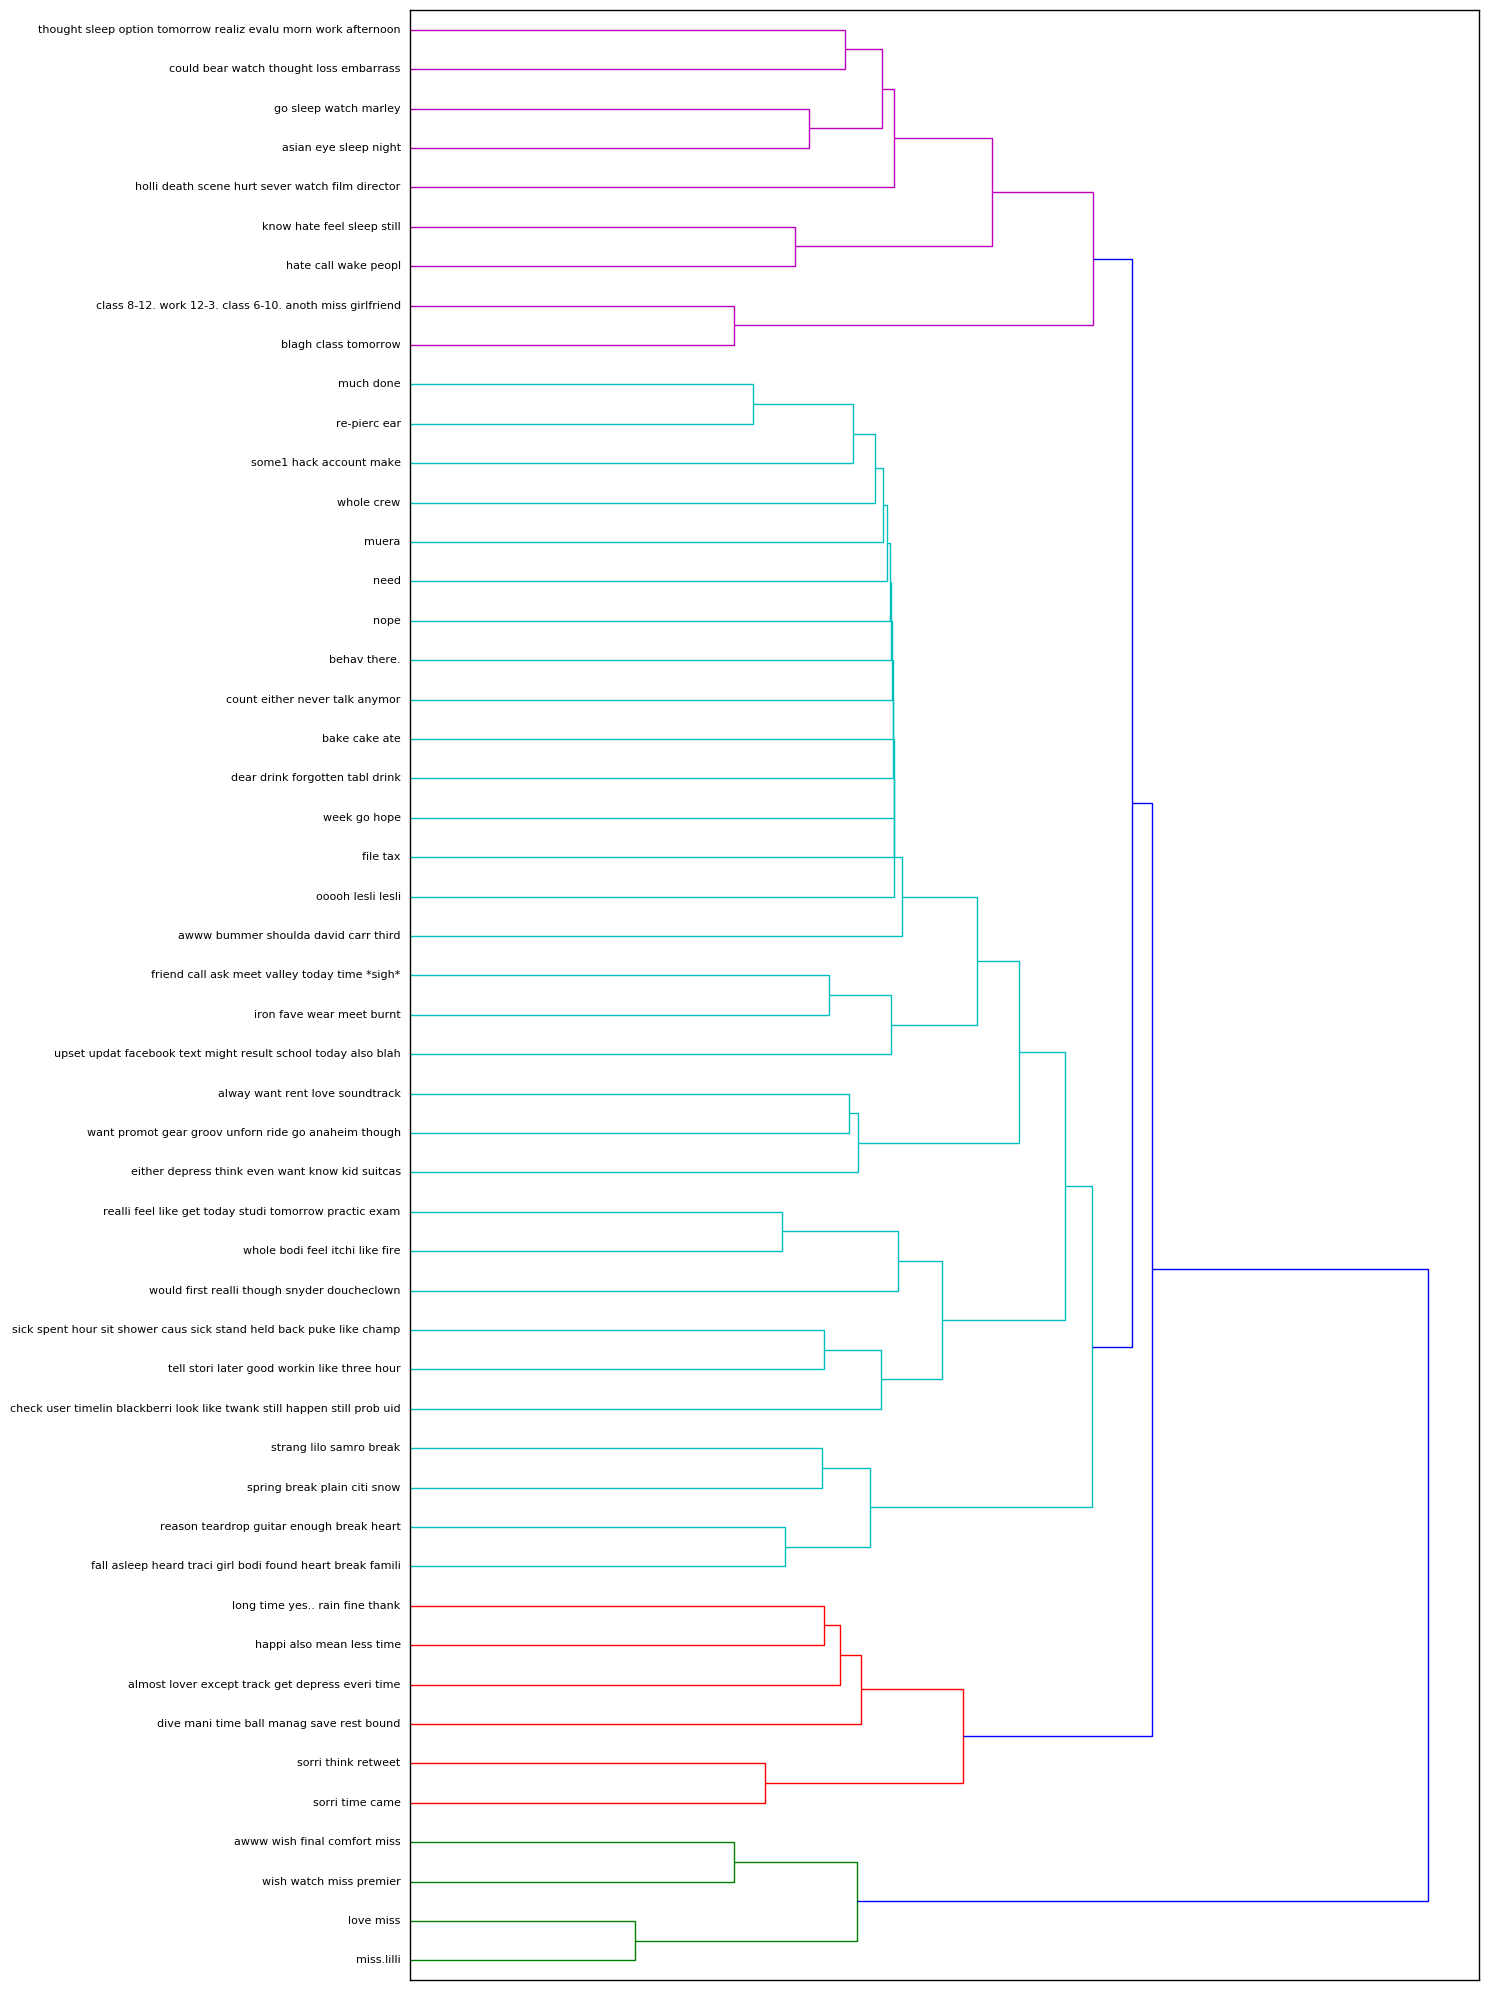

In [112]:
fig, ax = plt.subplots(figsize=(15, 20))
ax = dendrogram(linkage_matrix, orientation="right", labels=terms);

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() #show plot with tight layout

# Homework

Even with only 50 tweets there is still quite a lot of noise (also, still, like, etc.).
Re-run the experiment using more tweets and apply a more aggressive stop-wording scheme by analyzing token frequencies or analyzing the tf-idf matrix to remove terms which appear to be not important.

1. Define and apply an additional stop-wording dictionary
   1.1 Analyze term frequencies or tf-idf (or using any other method learned in class) and clear a file containing these terms
   1.2 Modify the 'apply_stopwording' function to include the stop-words you identified
2. Using different Linkage method, generate a new Dendogram

Are you getting better results?